In [1]:
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
# load data with relative path
script_dir = Path.cwd()
data_file = script_dir.parent / "data/processed_data.csv"
data = pd.read_csv(data_file)

# exlude all columns that are not numerical
data = data.select_dtypes(include=[np.number])
print(data.columns)

Index(['matchday_no', 'opponent_table_position', 'away_game', 'overtime',
       'tigers_win', 'opponent_points', 'tigers_points',
       'opponent_points_1st_quarter', 'tigers_points_1st_quarter',
       'opponent_points_2nd_quarter', 'tigers_points_2nd_quarter',
       'opponent_points_3rd_quarter', 'tigers_points_3rd_quarter',
       'opponent_points_4th_quarter', 'tigers_points_4th_quarter',
       'total_amount_fans', 'arena_occpuancy', 'field_goals_attempted',
       'field_goals_made', '2_pointer_percentage', '3_pointer_percentage',
       'free_throw_percentage', 'rebounds', 'assists', 'turnovers', 'steals',
       'fouls', 'jackson_minutes_played', 'jackson_points', 'jackson_assists',
       'rest_days'],
      dtype='object')


opponent_points               -0.813800
opponent_points_1st_quarter   -0.721833
opponent_points_3rd_quarter   -0.633722
turnovers                     -0.370173
matchday_no                   -0.286893
jackson_assists               -0.213507
opponent_points_4th_quarter   -0.196207
fouls                         -0.167880
jackson_minutes_played        -0.167671
2_pointer_percentage          -0.142817
tigers_points_3rd_quarter     -0.126000
jackson_points                -0.122469
rest_days                     -0.086989
overtime                      -0.084654
field_goals_attempted         -0.074511
away_game                     -0.040276
opponent_points_2nd_quarter   -0.000863
rebounds                       0.012454
field_goals_made               0.035066
opponent_table_position        0.043147
arena_occpuancy                0.059665
free_throw_percentage          0.084259
assists                        0.092676
total_amount_fans              0.189185
tigers_points_2nd_quarter      0.337089


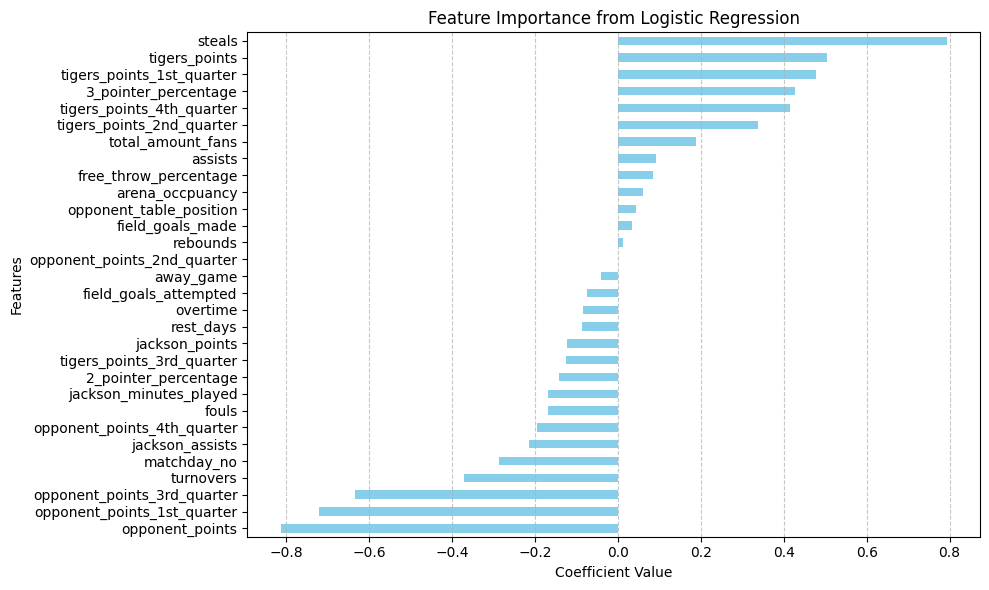

In [26]:
df = data
X = df.drop("tigers_win", axis=1)
y = df["tigers_win"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression to identify important features
model = LogisticRegression()
model.fit(X_scaled, y)

# Feature importance
importance = pd.Series(model.coef_[0], index=X.columns).sort_values()
print(importance)

plt.figure(figsize=(10, 6))
importance.plot(kind="barh", color="skyblue")
plt.title("Feature Importance from Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

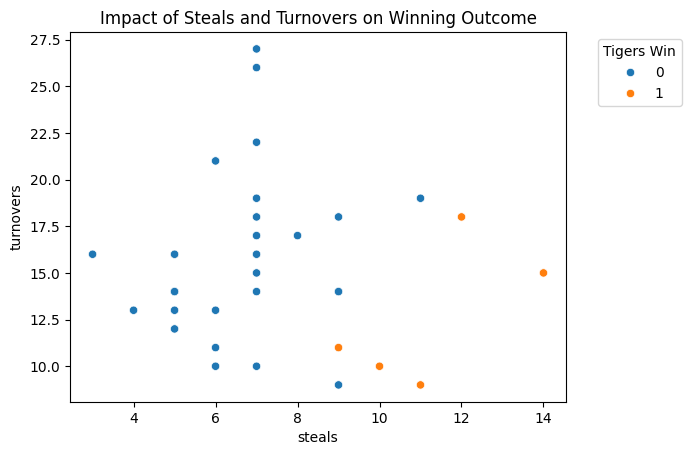

In [27]:
sns.scatterplot(data=data, x="steals", y="turnovers", hue="tigers_win")
plt.title("Impact of Steals and Turnovers on Winning Outcome")
plt.legend(title="Tigers Win", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Two features negatively correlating with the chance of Tübingen winning the game

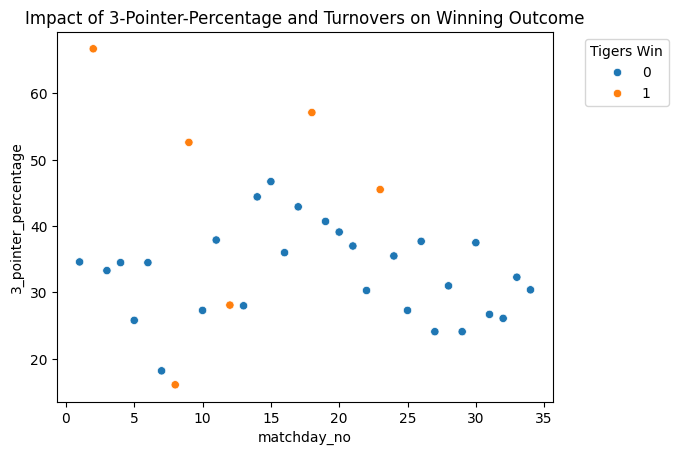

In [28]:
sns.scatterplot(data=data, x="matchday_no", y="3_pointer_percentage", hue="tigers_win")
plt.title("Impact of 3-Pointer-Percentage and Turnovers on Winning Outcome")
plt.legend(title="Tigers Win", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

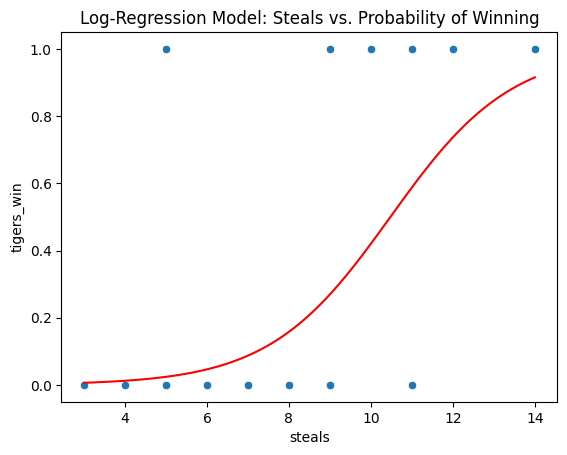

In [29]:
# 1D plot of steals and tigers win
# fit logistic regression model
feature = "steals"
feature_data_column = data[feature]
model = LogisticRegression()
model.fit(data[[feature]], data["tigers_win"])

# create a range for the decision boundary
x_range = np.linspace(feature_data_column.min(), feature_data_column.max(), 100)
x_range_df = pd.DataFrame({feature: x_range})  # Ensure feature names are included

# plot data and decision boundary
sns.scatterplot(data=data, x=feature, y="tigers_win")
sns.lineplot(x=x_range, y=model.predict_proba(x_range_df)[:, 1], color="red")
plt.title("Log-Regression Model: Steals vs. Probability of Winning")
plt.show()

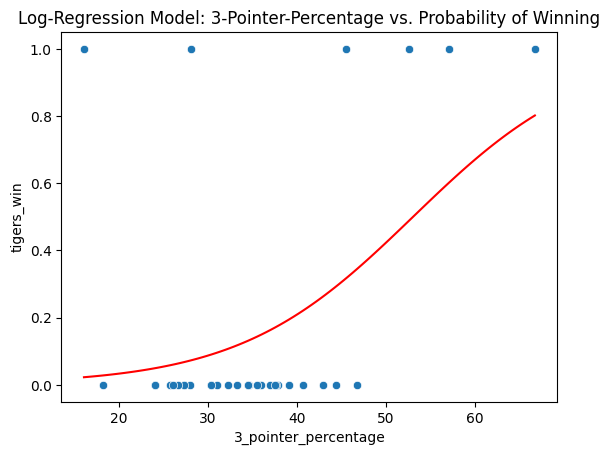

In [30]:
# 1D plot of 3-pointer percentage and tigers win
# fit logistic regression model
feature = "3_pointer_percentage"
feature_data_column = data[feature]
model = LogisticRegression()
model.fit(data[[feature]], data["tigers_win"])

# create a range for the decision boundary
x_range = np.linspace(feature_data_column.min(), feature_data_column.max(), 100)
x_range_df = pd.DataFrame({feature: x_range})  # Ensure feature names are included

# plot data and decision boundary
sns.scatterplot(data=data, x=feature, y="tigers_win")
sns.lineplot(x=x_range, y=model.predict_proba(x_range_df)[:, 1], color="red")
plt.title("Log-Regression Model: 3-Pointer-Percentage vs. Probability of Winning")
plt.show()

opponent_points               -9.044236
field_goals_made              -4.562662
steals                        -1.652825
free_throw_percentage         -1.073374
jackson_assists               -1.072498
opponent_table_position       -0.823910
away_game                     -0.765487
fouls                         -0.732911
total_amount_fans             -0.373928
jackson_points                -0.255295
rebounds                       0.165303
matchday_no                    0.304517
rest_days                      0.373291
jackson_minutes_played         0.454505
2_pointer_percentage           0.927423
assists                        0.951781
arena_occpuancy                1.027617
turnovers                      1.120296
3_pointer_percentage           2.153532
opponent_points_1st_quarter    3.735757
opponent_points_2nd_quarter    4.357605
field_goals_attempted          4.669354
opponent_points_3rd_quarter    4.851925
opponent_points_4th_quarter    5.144935
tigers_points_2nd_quarter      5.273927


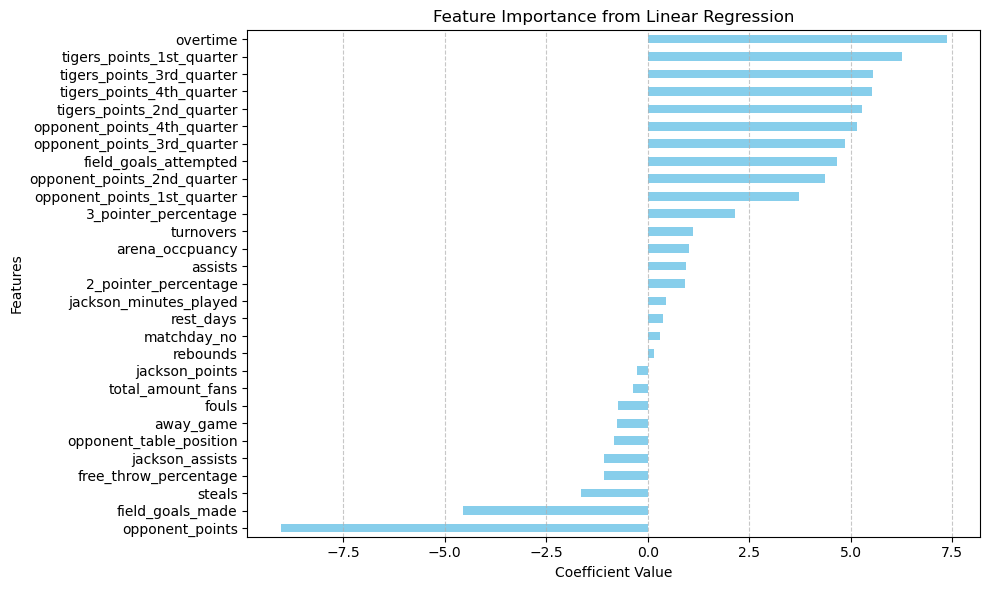

In [17]:
# Linear Regression Model
df = data
X = df.drop(columns=["tigers_win", "tigers_points"])
y = df["tigers_points"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression to identify important features
model = LinearRegression()
model.fit(X_scaled, y)

# Feature importance
importance = pd.Series(model.coef_, index=X.columns).sort_values()
print(importance)

plt.figure(figsize=(10, 6))
importance.plot(kind="barh", color="skyblue")
plt.title("Feature Importance from Linear Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

field_goals_attempted         -18.949157
turnovers                      -5.422534
arena_occpuancy                -3.253440
jackson_minutes_played         -2.996875
2_pointer_percentage           -1.964693
opponent_points                -1.394101
away_game                      -1.376329
matchday_no                    -1.113285
3_pointer_percentage           -0.534648
opponent_table_position        -0.087362
assists                        -0.084874
jackson_points                  0.647474
opponent_points_2nd_quarter     0.815400
rest_days                       1.002902
overtime                        1.169388
opponent_points_3rd_quarter     1.408409
total_amount_fans               1.680064
opponent_points_4th_quarter     2.340639
opponent_points_1st_quarter     2.499620
fouls                           2.918344
steals                          3.259934
jackson_assists                 3.516698
free_throw_percentage           3.607048
rebounds                        7.173812
field_goals_made

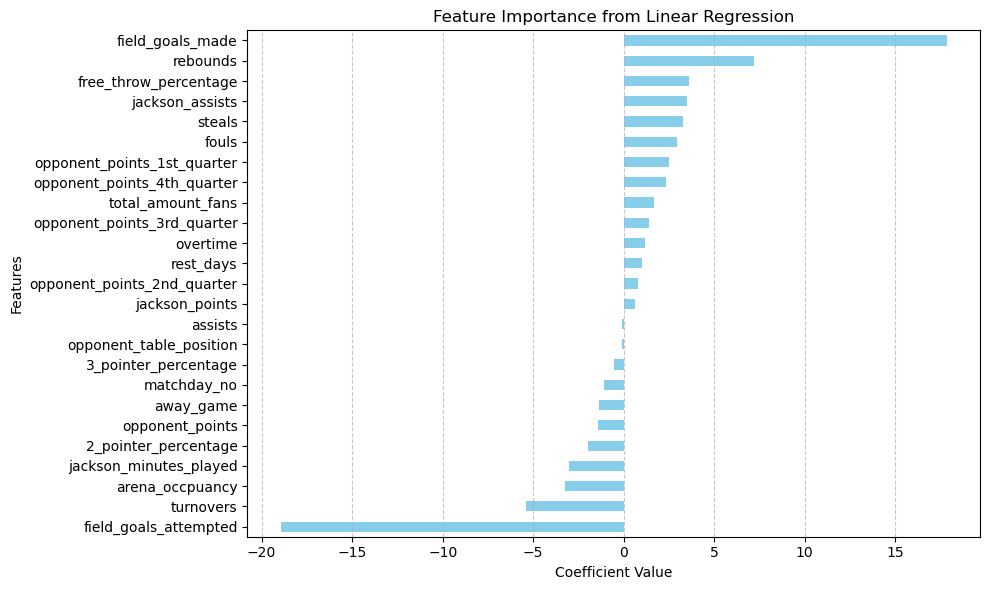

In [13]:
# Linear Regression Model without quarter points of the Tigers
df = data
X = df.drop(columns=["tigers_win", "tigers_points", "tigers_points_1st_quarter", "tigers_points_2nd_quarter", "tigers_points_3rd_quarter", "tigers_points_4th_quarter"])
y = df["tigers_points"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression to identify important features
model = LinearRegression()
model.fit(X_scaled, y)

# Feature importance
importance = pd.Series(model.coef_, index=X.columns).sort_values()
print(importance)

plt.figure(figsize=(10, 6))
importance.plot(kind="barh", color="skyblue")
plt.title("Feature Importance from Linear Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

field_goals_attempted     -16.096847
turnovers                  -4.960064
arena_occpuancy            -3.147042
2_pointer_percentage       -2.265864
jackson_points             -1.996347
matchday_no                -1.418849
3_pointer_percentage       -0.954494
jackson_minutes_played     -0.494261
away_game                  -0.227172
assists                     0.126085
rest_days                   0.181102
overtime                    0.962303
opponent_table_position     0.978904
total_amount_fans           1.349936
steals                      2.834623
rebounds                    3.984037
free_throw_percentage       3.988408
fouls                       4.439015
jackson_assists             4.703166
field_goals_made           16.388173
dtype: float64


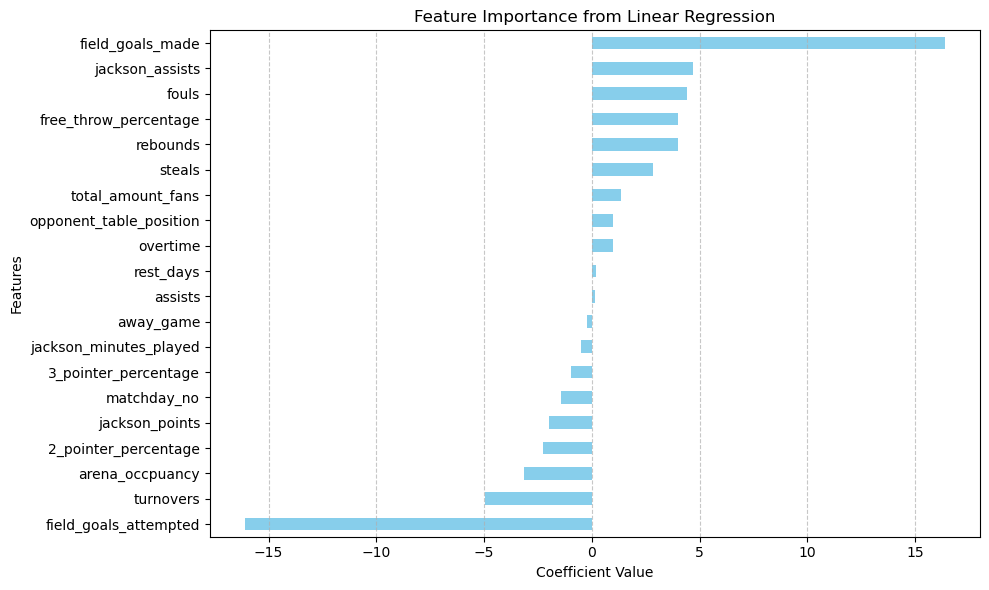

In [14]:
# Linear Regression Model without quarter points of both teams
df = data
X = df.drop(columns=["tigers_win", "tigers_points", "tigers_points_1st_quarter", "tigers_points_2nd_quarter", "tigers_points_3rd_quarter", "tigers_points_4th_quarter", "opponent_points", "opponent_points_1st_quarter", "opponent_points_2nd_quarter", "opponent_points_3rd_quarter", "opponent_points_4th_quarter"])
y = df["tigers_points"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression to identify important features
model = LinearRegression()
model.fit(X_scaled, y)

# Feature importance
importance = pd.Series(model.coef_, index=X.columns).sort_values()
print(importance)

plt.figure(figsize=(10, 6))
importance.plot(kind="barh", color="skyblue")
plt.title("Feature Importance from Linear Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

jackson_minutes_played    -0.234862
field_goals_made          -0.167343
matchday_no               -0.104535
away_game                 -0.085748
overtime                  -0.034040
assists                   -0.004921
jackson_assists            0.005239
rest_days                  0.008462
total_amount_fans          0.011291
turnovers                  0.018993
arena_occpuancy            0.024710
opponent_table_position    0.080986
steals                     0.083246
free_throw_percentage      0.095928
rebounds                   0.142916
fouls                      0.187457
2_pointer_percentage       0.236113
field_goals_attempted      0.248020
jackson_points             0.272970
3_pointer_percentage       0.392214
dtype: float64


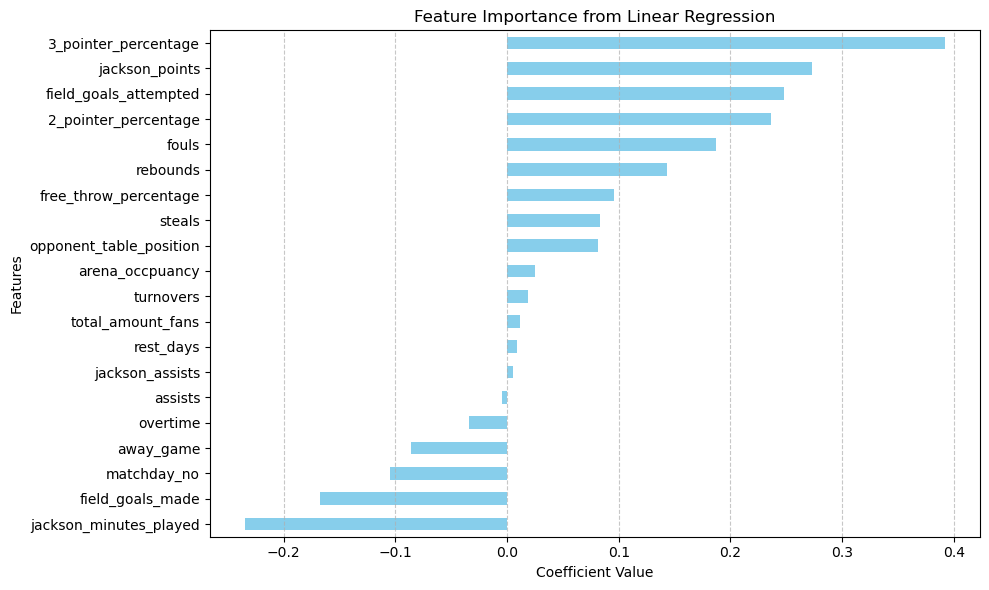

In [ ]:
# Experiment:
# Logistic Regression Model with boolean target whether they obtained more points as the average
df = data
X = df.drop(columns=["tigers_win", "tigers_points", "tigers_points_1st_quarter", "tigers_points_2nd_quarter", "tigers_points_3rd_quarter", "tigers_points_4th_quarter", "opponent_points", "opponent_points_1st_quarter", "opponent_points_2nd_quarter", "opponent_points_3rd_quarter", "opponent_points_4th_quarter"])

# Compute the mean of the tigers_points
mean = df["tigers_points"].mean()

# Create the target variable y as a boolean
y = (df["tigers_points"] >= mean).astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression to identify important features
model = LinearRegression()
model.fit(X_scaled, y)

# Feature importance
importance = pd.Series(model.coef_, index=X.columns).sort_values()
print(importance)

plt.figure(figsize=(10, 6))
importance.plot(kind="barh", color="skyblue")
plt.title("Feature Importance from Linear Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()